## ■ 특성 스케일 맞추기(Standardization & Normalizing)
- 데이터의 값이 너무 크거나, 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으로 수렴하거나 무한으로 발산해 버릴 수 있는 것을 방지
- 혹은 예측 값이 범위를 벗어나는 입력데이터의 값에 더 큰 영향을 받는 것을 방지함.

- 일반적으로 대부분의 머신러닝과 최저고하 알고리즘은 특성의 스케일이 같을 때 훨씬 성능이 좋다.
- **스케일이 다른 특성을 맞추는 대표적인 방법 2가지 표준화(Standardization), 정규화(Normalization)**
- **스케일링은 자료 집합에 적용되는 전처리 과정으로 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.**
- **스케일링은 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지하고 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킨다.**

## ■ 회귀에서의 스케일
- 회귀분석에서의 조건수(condition number)는 변화의 비율에 대해 함수가 얼마나 크게 변하는지에 대한 인자 측정치로. 조건수가 크면 약간의 오차만 있어도 전혀 다른 해를 가질 수 있음. 따라서 조건 수가 큰 경우 아래와 같은 방법으로 해결 해야 함.

#### 가. 변수들의 단위 차이가 있는 경우
- 스케일링으로 해결
#### 나. 상관관계가 큰 독립 변수들이 있는 경우
- 변수 선택 및 제거나 PCA를 사용한 차원 축소 등으로 해결

#### 다. 독립 변수나 종속 변수가 심하게 한쪽으로 치우친 분포를 보이는 경우 (혹은 독립 변수와 종속 변수 간의 관계가 비선형 관계를 보이는 경우)
- 로그함수 or 제곱근 함수를 사용하여 변수를 변환하면 회귀 성능이 향상될 수 도 있음.

### 1. Standardization (표준화)
- 데이터 분석을 하다보면 변수들 간의 척도(scale)가 서로 달라 직접적으로 상호 비교를 할 수 가 없어, 이로인해 모수의 왜곡이 생길 수도 있다.
- **따라서 모델링 작업에 들어가기 전에 변수들 간의 척도가 다른 경우에 보통 표준화(Scale Standardization)을 진행하는 것이 일반적이다.** (모수와 비모수 차이 여부 = 표준화 진행 여부)

- 표준화는 일반적으로 이상치 정보가 유지된다.
- 결론은 모든 스케일러 처리 전에는 아웃라이어 제거가 선행되어져야 하며,
- 데이터의 분포 특징에 따라 적절한 스케일러를 적용해주는 것이 필요.

![데이터변환1_표준화](img/데이터변환1_표준화.jpg)
![Standardization](img/Standardization.jpg)

#### 가. StandardScaler 
- **가장 일반적인 기존 변수에 범위를 정규 분포로 변환**
- (x-x평균값)/(x의 표준편차)
- 데이터의 최소, 최대 값을 모를 경우 사용
- 각 Feature의 평균을 0, 분산을 1로 변경하고 모든 특성들이 같은 스케일을 갖게 함. 평균을 제거하고 데이터를 단위 분산으로 조정한다.
- 이상치가 있을 경우 평균과 표준편차에 큰 영향을 미쳐 데이터의 확산은 매우 달라짐. - **즉 이상치(Outlier) 가 있는 경우 균형 잡힌 척도를 보장할 수 없게 됨.**

#### 나. RobustScaler
- **아웃라이어의 영향을 최소화환 기법**이다. 
- 중앙값(median)과 IQR(interquartile Range)를 사용하기 때문에 표준화 한 후에 동일한 값을 더 넓게 분포 시킨다.
- IOR = Q3-Q1의 25 percentile과 75percentile의 값들을 다룬다.

#### 정리
![Scaler_type](img/Scaler_type.PNG)

<hr>

### 정규화 (Normalization)
- 특성의 스케일을 [0, 1] 범위에 맞추는 것

#### 가. MinMaxScaler
- **모든 Feature값이 0~1사이에 있도록 데이터를 재조정**
- 이상치가 있을 경우 변환된 값이 매우 좁은 범위로 압축될 수 있음
- **즉 MinMaxScaler 역시 아웃라이어의 존재에 매우 민감**

#### 나. MaxAbsScaler (절대값)
- **모든 Feature의 절대값이 0~1사이에 있도록 데이터를 재조정 즉 -1 ~ 1사이로 재조정한다.**
- **양수 데이터셋에서는 MinMaxScaler와 유사하게 동작하며 큰 이상치에 민감할 수 있다.**

![minmax_scaler](img/minmax_scaler.jpg)

## ■ 소스코드
### Standardization
#### 0) Numpy : z=(x-mean()) / std()
#### 1) sklearn.preprocessing : 
    - StandardScaler() vs RobustScaler()

- **Standard 표준화는 정규분포를 따르는 데이터의 표준 정규분포로의 표준화 (z-standardization) (평균과 표준편차 이용)**
- **Robust 표준화는 이상치/특이값이 포함되어 있는 데이터의 표준화 (scaling data with outliers) (중앙값과 IQR 이용)**

#### 2) scipy.stats : zscore()

### Normalization
#### 1) sklearn.preprocessing :
    - MinMaxScaler()


In [28]:
import numpy as np
# 여러개 쳐도 나오게
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data = np.random.randint(30, size=(6,5))
print(data, '\n')

print('mean:', np.mean(data))
print('standard deviation:', np.std(data))
print('variance:', np.var(data))

[[14 17 21 13  9]
 [ 1  4 23 28  7]
 [27  7  9  7 22]
 [ 0  3  9 20 12]
 [ 4  6 14 24 20]
 [10  9  2  1 26]] 

mean: 12.3
standard deviation: 8.422786553945988
variance: 70.94333333333334


In [29]:
## (0) Numpy를 이용한 표준화
from numpy import *

# (X-mean()) / std()
standardized_np = (data - mean(data, axis=0)) / std(data,axis=0)
standardized_np

array([[ 0.5 ,  2.03,  1.1 , -0.26, -0.99],
       [-0.9 , -0.8 ,  1.37,  1.32, -1.28],
       [ 1.9 , -0.14, -0.55, -0.9 ,  0.85],
       [-1.  , -1.01, -0.55,  0.48, -0.57],
       [-0.57, -0.36,  0.14,  0.9 ,  0.57],
       [ 0.07,  0.29, -1.51, -1.53,  1.42]])

---- 이상치 삽입 전----
평균: 9.901501456186267 표준편차: 1.8366199435787938


(array([ 1.,  1.,  3.,  7., 27., 19., 24.,  9.,  7.,  2.]),
 array([ 3.59,  4.71,  5.83,  6.94,  8.06,  9.18, 10.3 , 11.42, 12.53,
        13.65, 14.77]),
 <a list of 10 Patch objects>)

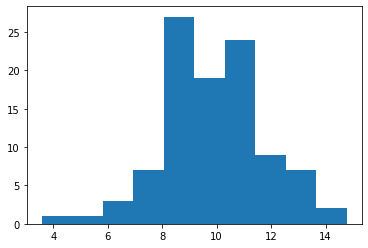

In [34]:
# (1) sklearn.preprocessing을 이용한 표준화 - Standard Scaler vs Robust Scaler

from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd

# setting the number of digits of precision for floating point output
np.set_printoptions(precision=2)

# making 100 random x ~ N(10, 2)
mu, sigma = 10, 2
x = mu + sigma*np.random.randn(100)

print('---- 이상치 삽입 전----')
print('평균:', np.mean(x), '표준편차:', np.std(x))
plt.hist(x)

---- 이상치 생성 후----
평균: 10.728344250374496 표준편차: 5.900538198514582


(array([15., 76.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 3.59,  8.23, 12.87, 17.51, 22.15, 26.8 , 31.44, 36.08, 40.72,
        45.36, 50.  ]),
 <a list of 10 Patch objects>)

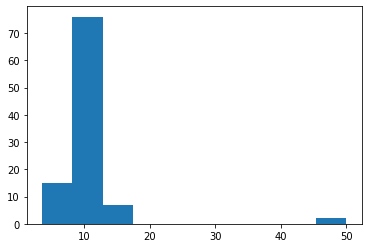

In [36]:
# (1) 이상치 강제 생성
x[98:100] = 50

print('---- 이상치 생성 후----')
print('평균:', np.mean(x), '표준편차:', np.std(x))
plt.hist(x)


---- StandardScaler 생성 후----
평균: -1.0658141036401502e-16 표준편차: 0.9999999999999998


(array([15., 76.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-1.21, -0.42,  0.36,  1.15,  1.94,  2.72,  3.51,  4.3 ,  5.08,
         5.87,  6.66]),
 <a list of 10 Patch objects>)

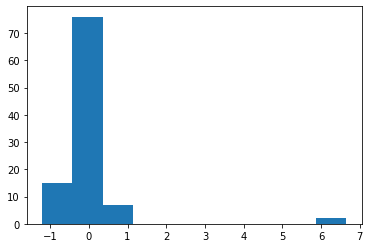

In [46]:
# (1) StandardScaler()
x = x.reshape(-1,1)
x_StandardScaler = StandardScaler().fit_transform(x)

print('---- StandardScaler 생성 후----')
print('평균:', np.mean(x_StandardScaler), '표준편차:', np.std(x_StandardScaler))

plt.hist(x_StandardScaler)

(array([ 1.,  1.,  3.,  7., 25., 19., 24.,  9.,  7.,  2.]),
 array([-1.21, -1.02, -0.83, -0.64, -0.45, -0.26, -0.07,  0.12,  0.31,
         0.5 ,  0.68]),
 <a list of 10 Patch objects>)

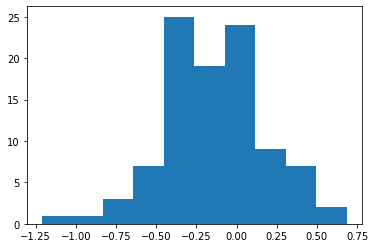

In [47]:
# (1) StandardScaler() - zoom in (잘라내기)

x_StandardScaler_zoomin = x_StandardScaler[x_StandardScaler<5]
plt.hist(x_StandardScaler_zoomin)

---- RobustScaler 생성 후----
평균: 0.3079424933594497 표준편차: 2.4534385732380644


(array([15., 76.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-2.66, -0.73,  1.2 ,  3.13,  5.06,  6.99,  8.92, 10.85, 12.78,
        14.71, 16.64]),
 <a list of 10 Patch objects>)

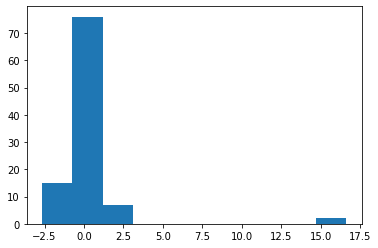

In [44]:
# (1) Robust Scaler (데이터의 median과 IQR을 이용)
x = x.reshape(-1,1)
x_RobustScaler = RobustScaler().fit_transform(x)

print('---- RobustScaler 생성 후----')
print('평균:', np.mean(x_RobustScaler), '표준편차:', np.std(x_RobustScaler))

plt.hist(x_RobustScaler)

(array([ 1.,  1.,  3.,  7., 25., 19., 24.,  9.,  7.,  2.]),
 array([-2.66, -2.19, -1.73, -1.27, -0.8 , -0.34,  0.13,  0.59,  1.06,
         1.52,  1.99]),
 <a list of 10 Patch objects>)

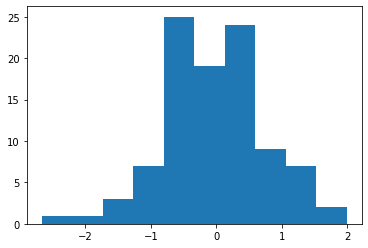

In [45]:
# (1) Robust Scaler (데이터의 median과 IQR을 이용) - zoom in (잘라내기)

x_RombustScaler_zoomin = x_RobustScaler[x_RobustScaler<5]
plt.hist(x_RombustScaler_zoomin)

## 결론
- **StandardScaler() 보다 RobustScaler()가 동일한 값을 좀더 넓게 분포시키고 있음.** 
- **이는 목표변수 y값을 분류나 예측하는데 있어 산포가 더 크기 때문에 설명변수 x변수로서 더 유용하다고 추정 할 수 있음.**

In [52]:
# (2) scipy.stats 를 이용한 표준화
import scipy.stats as ss

# ss.zscore()
data_standadized_ss = ss.zscore(data)
data_standadized_ss

array([[ 0.5 ,  2.03,  1.1 , -0.26, -0.99],
       [-0.9 , -0.8 ,  1.37,  1.32, -1.28],
       [ 1.9 , -0.14, -0.55, -0.9 ,  0.85],
       [-1.  , -1.01, -0.55,  0.48, -0.57],
       [-0.57, -0.36,  0.14,  0.9 ,  0.57],
       [ 0.07,  0.29, -1.51, -1.53,  1.42]])

In [55]:
# 정규화 (Normalizing) -> MinMaxScaler 3가지 방법

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, minmax_scale

# 표준화 (1) MinMaxScaler()
X = np.array([[10, -10, 1], [5,0,2], [0,10,3]])

# 변환 (1) 최소, 최댓값을 구해서 0~1 범위로 변환
X_MinMax = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_MinMax

# 변환 (2) MinMaxScaler() 를 사용한 최소, 최대 0~1범위 변환
min_max_scaler = MinMaxScaler()
X_MinMax_train = min_max_scaler.fit_transform(X)
X_MinMax_train

# 변환 (3) sklearn.preprocessing.minmax_scale() 을 사용한 최소, 최대 0~1범위 변환
X_MinMax_scaled = minmax_scale(X, axis=0, copy=True)
X_MinMax_scaled


array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

## 참고 문헌
- https://ebbnflow.tistory.com/137
- https://mkjjo.github.io/python/2019/01/10/scaler.html
- https://rfriend.tistory.com/269
- https://rfriend.tistory.com/268
- https://rfriend.tistory.com/52 // 그림출처
- https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling // preprocessing data
